In [1]:
# import required libraries

import pickle
import re

import itertools
import math

import os
import sys

import libsbml
import numpy as np
import pandas as pd
from scipy.stats import percentileofscore
import copy

from Bio import Phylo

from io import StringIO

from scipy.interpolate import interp1d
from scipy.stats import percentileofscore
from scipy.stats import gaussian_kde
import math
import seaborn as sns
import itertools
import plotly.figure_factory as ff
import plotly.io as pio


import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['figure.dpi'] = 300
arial_font = fm.FontProperties(fname='arial.ttf')
plt.rcParams['font.family'] = arial_font.get_name()

In [2]:
#%% specify working directory, model path
cd = os.getcwd()
wd = os.path.dirname(cd)
sys.path.append(os.path.join(wd,'bin'))

sbml_file = "SPARCED.xml"


sbml_reader = libsbml.SBMLReader()
sbml_doc = sbml_reader.readSBML(os.path.join(wd,sbml_file))
sbml_model = sbml_doc.getModel()

species_all = [str(x.getId()) for x in list(sbml_model.getListOfSpecies())]

output_dir_main = os.path.join(wd,'output')

exp_title = 'in_silico_drs'
output_main = os.path.join(wd,'output',exp_title)


dir_doses_all = os.listdir(os.path.join(output_main,'drs_alpel','drs_alpel_rep1'))

doses_all = [float(x.split('_')[-1]) for x in dir_doses_all]

doses_all.sort()

# import class for reading dose response outputs

from modules.drsPlotting import drs_dict



In [3]:
# load median cell population dynamics dataset 

with open(os.path.join(wd,'output','in_silico_drs_summary','drs_median.pkl'),'rb') as f:
    drs_median = pickle.load(f)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

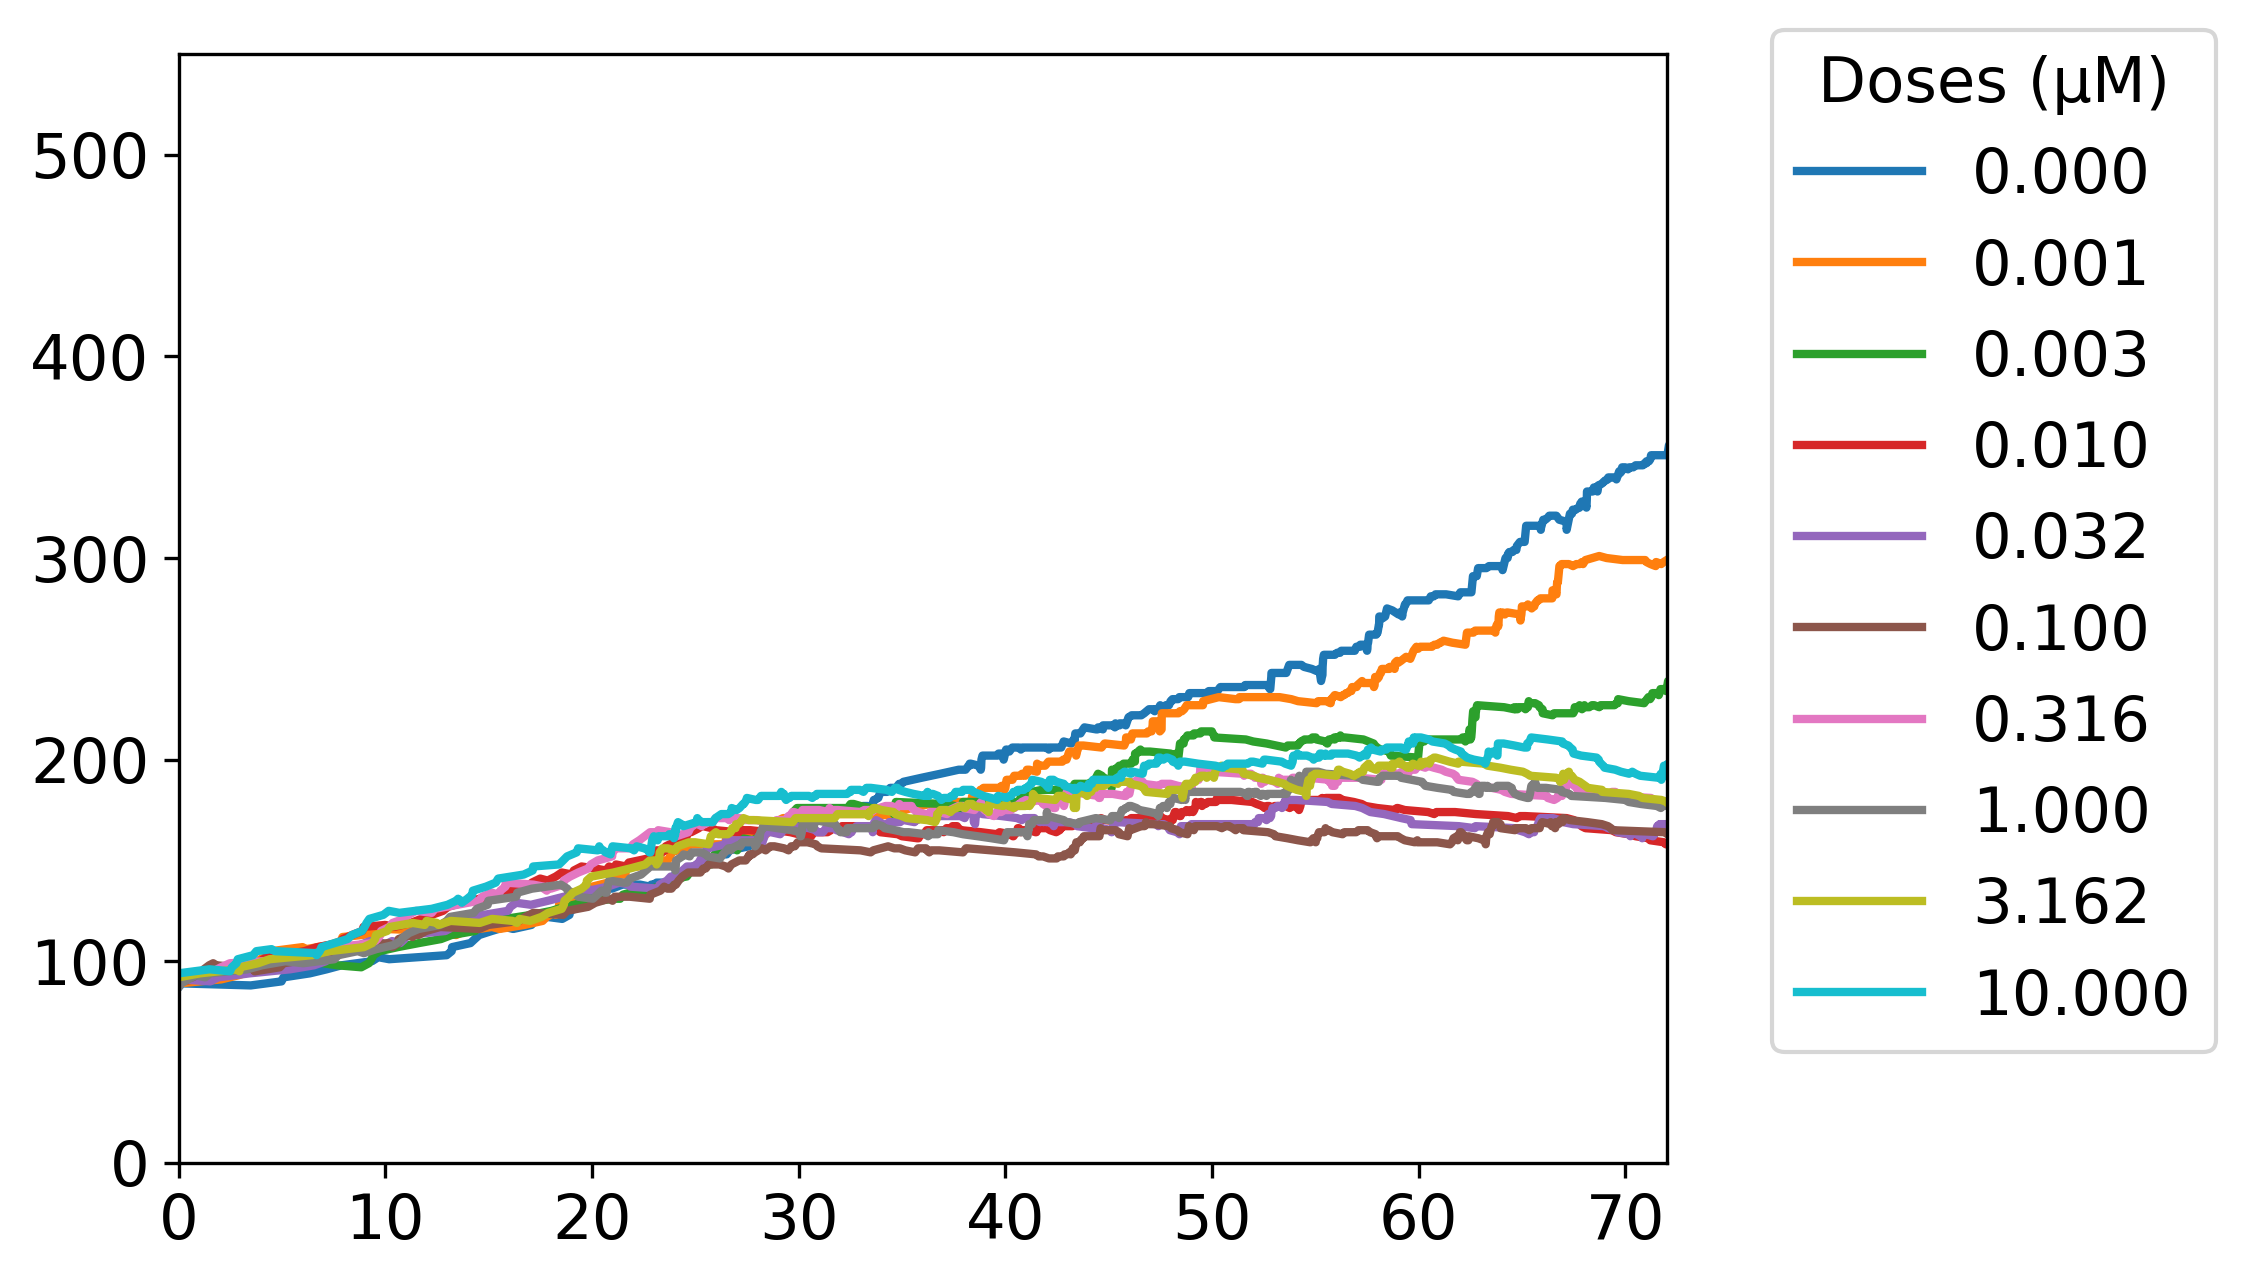

In [4]:
#%% median population dynamics for trametinib (figure 2a)


drug = 'trame'

for dl in range(10):
    
    dose = doses_all[dl]
    
    x_dl = drs_median[drug]['d'+str(dl)]['tout']/3600
    y_dl = drs_median[drug]['d'+str(dl)]['cellpop']
    
    plt.plot(x_dl,y_dl,linewidth=2,label=f"{doses_all[dl]:.3f}")
    

plt.legend(bbox_to_anchor=(1.05,1.05),title='Doses (\u03BCM)',fontsize=15,title_fontsize=15)
plt.ylim(0,550)
plt.xlim(0,72)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.xlabel('Time (h)')
# plt.ylabel('# of cells')
# plt.title(drugs_exp[2])
plt.show()

In [5]:
# load simulation dataset for control and trametinib dose level 5 (0.1 uM), replicate 1

trame1_0 = drs_dict(output_main,'trame',1,0) # control
trame1_5 = drs_dict(output_main,'trame',1,5) # 0.1 uM


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

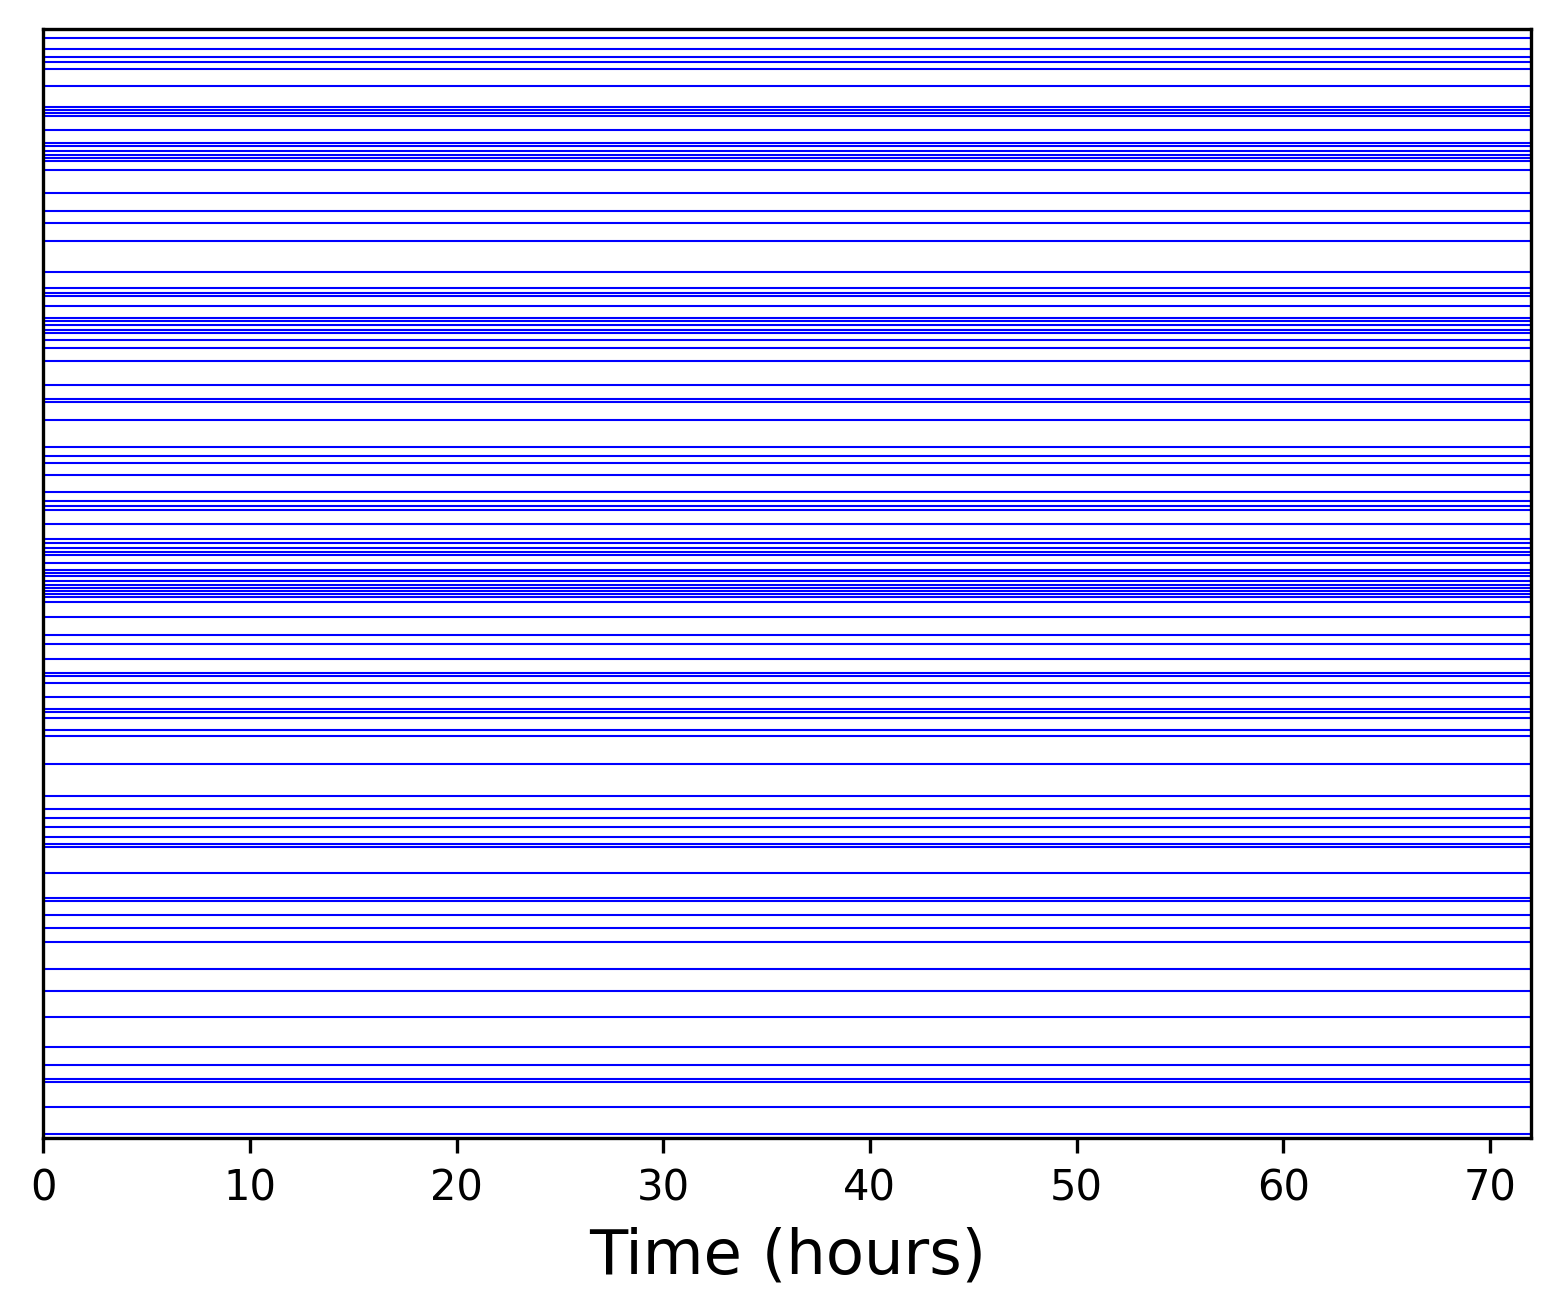

In [6]:
# cell population dendrogram for control (Figure 2b)

trame1_0.dendro()

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

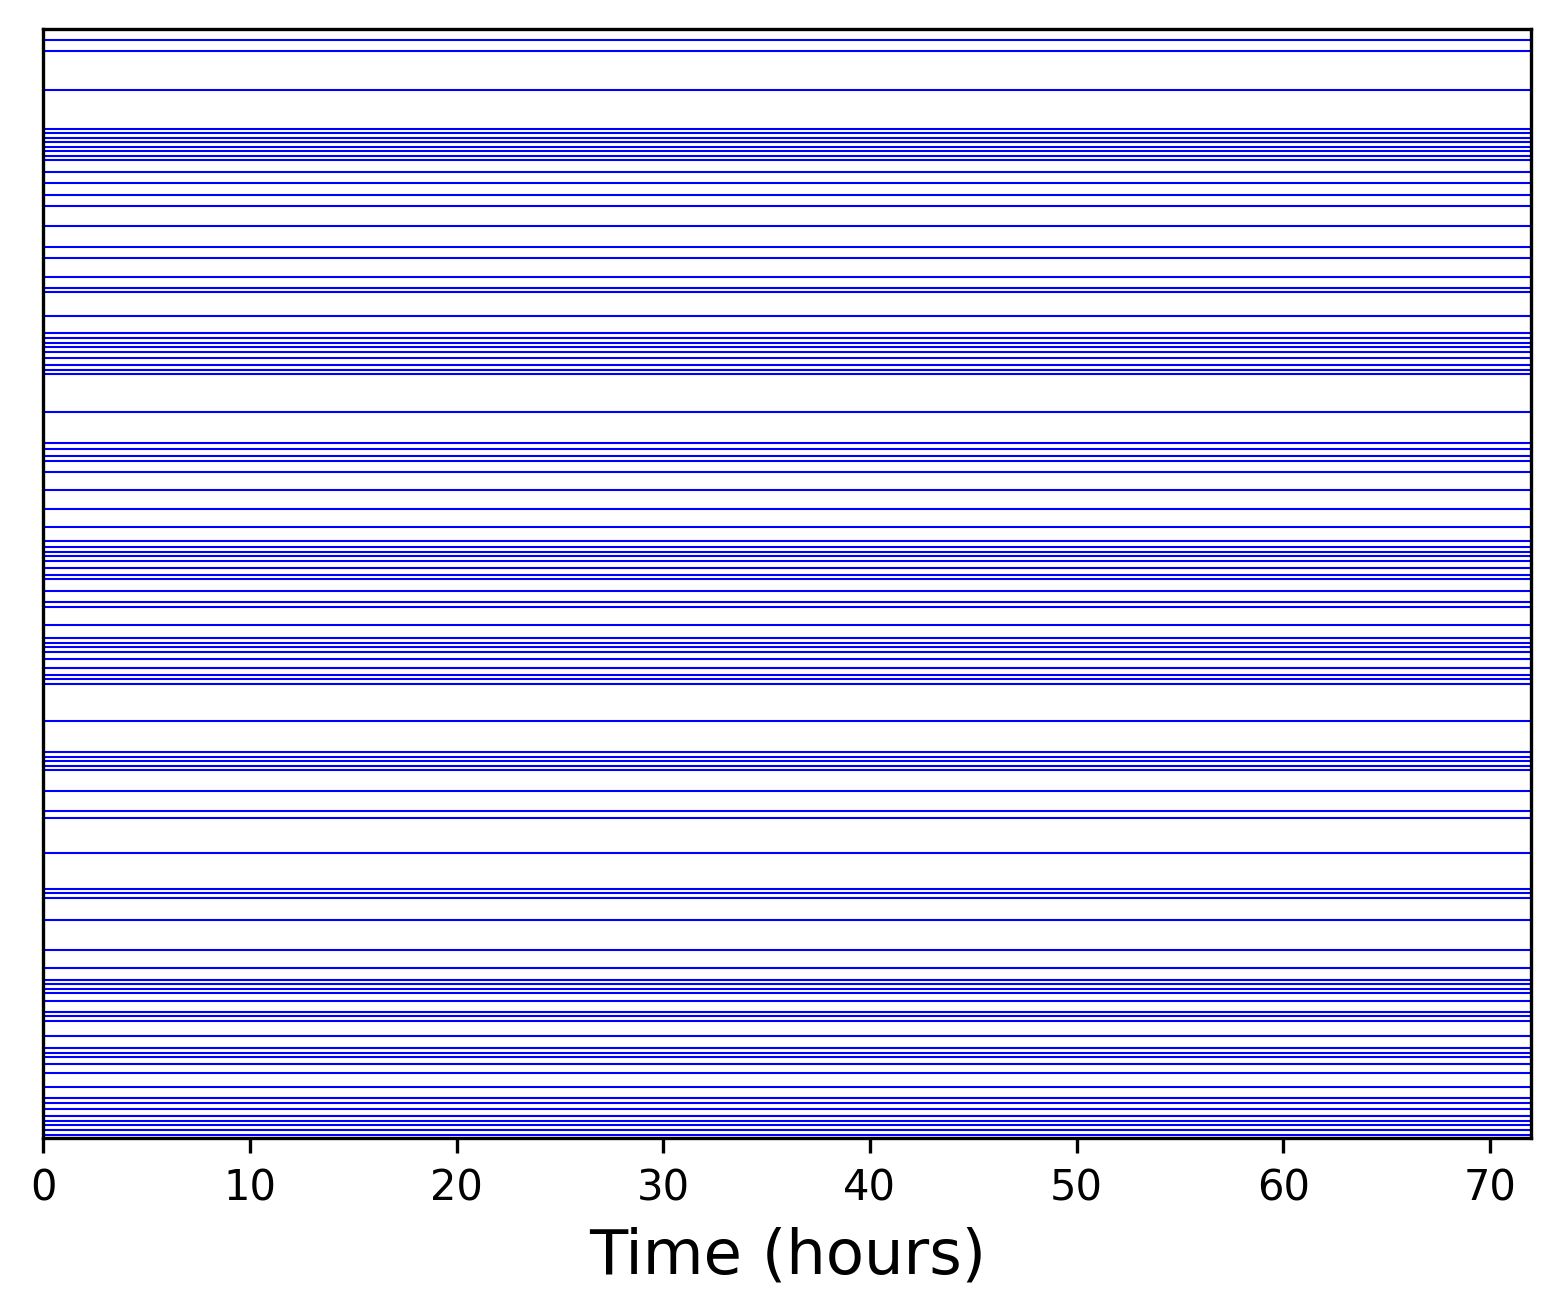

In [7]:
# cell population dendrogram for trametinib dose level 5 (Figure 2c)

trame1_5.dendro()
